In [5]:

!pip show tensorflow
!pip show pandas
!pip show matplotlib
!pip show scikit-learn


Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 
Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list o

In [7]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [19]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Toxicity-analysis\jigsaw-toxic-comment-classification-challenge\train.csv\train.csv')

In [21]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [23]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [25]:
from tensorflow.keras.layers import TextVectorization

In [27]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [29]:
MAX_FEATURES = 200000 # number of words in the vocab

In [31]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [33]:
vectorizer.adapt(X.values)

In [35]:
vectorized_text = vectorizer(X.values)

In [37]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [39]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [43]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [45]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2360s 338ms/step - loss: 0.0831 - val_loss: 0.0484


In [51]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

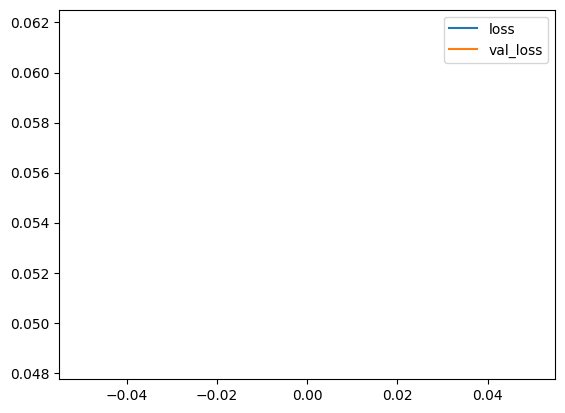

In [53]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [65]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example input_text
input_text = ["This is a sample input text."]  # Use your actual input text here

# Initialize and fit the tokenizer (use the same tokenizer used during training)
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(input_text)  # Ensure this is done with your training data

# Convert the input text to sequences
sequences = tokenizer.texts_to_sequences(input_text)

# Pad the sequences to the required length
maxlen = 1800  # Use the actual maxlen used during model training
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Check the shape of the padded_sequences
print(padded_sequences.shape)  # Should print (1, 1800) if you have one input text

# Predict using the model
res = model.predict(padded_sequences)

# Output the result
print(res)


(1, 1800)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
[[4.2299468e-02 6.1598825e-05 7.7896449e-03 3.6959597e-04 2.9547240e-03
  3.2600467e-03]]


In [71]:
(res > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0]])

In [73]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [75]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [77]:
res.shape

(1, 6)

In [79]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [81]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [83]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [85]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7629283666610718, Recall:0.7401027679443359, Accuracy:0.47843530774116516


In [87]:
!pip install gradio jinja2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     -------------------------------------- 51.6/51.6 kB 881.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.2/12.3 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/12.3 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.3/12.3 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/12.3 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.6/12.3 MB 2.1 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/12.3 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/12.3 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/12.3 MB 2.8 MB/s et

In [115]:
import tensorflow as tf
import gradio as gr

In [91]:
model.save('toxicity.h5')

In [93]:
model = tf.keras.models.load_model('toxicity.h5')

In [95]:
input_str = vectorizer('hey i freaken hate you!')

In [97]:
res = model.predict(np.expand_dims(input_str,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [99]:
res

array([[0.7958554 , 0.01724097, 0.36628178, 0.01995577, 0.37578994,
        0.07242891]], dtype=float32)

In [167]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [169]:

# Define Gradio interface
interface = gr.Interface(
    fn=score_comment,
    inputs=gr.components.Textbox(lines=2, placeholder='Enter your comment here'),
    outputs=gr.components.Textbox()
)

# Launch the interface
interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
